In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('nipy_spectral')
from scipy import stats
from sklearn.model_selection import train_test_split
import pydataset as data

from acquire import get_telco_data
from prepare import clean_telco_data, prep_telco_data

from env import get_db_url

α = .05

In [2]:
telco_df = get_telco_data()

In [3]:
#train.total_charges = train.total_charges.astype('float')
#train.dtypes

In [4]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.60,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.90,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.90,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.00,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.90,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,2,55.15,742.9,No,2,One year,2,Mailed check,1,DSL
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,1,85.10,1873.7,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,2,50.30,92.75,No,1,Month-to-month,2,Mailed check,1,DSL
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,2,67.85,4627.65,No,3,Two year,2,Mailed check,1,DSL


In [5]:
train, validate, test = prep_telco_data(telco_df)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
3270,4673-KKSLS,Female,No,No,No,31,Yes,No,Yes,No,...,0,0,0,0,0,0,1,0,1,0
6084,8623-ULFNQ,Female,Yes,No,No,26,Yes,Yes,No,No,...,0,1,1,0,0,0,1,0,0,0
4470,6303-KFWSL,Female,No,No,No,29,Yes,Yes,No,Yes,...,0,0,1,1,0,0,1,0,0,0
428,0623-IIHUG,Female,Yes,No,No,21,No,No phone service,Yes,No,...,0,0,1,0,0,0,1,0,0,0
3329,4742-DRORA,Male,No,Yes,Yes,60,Yes,Yes,Yes,No,...,0,0,1,1,0,0,0,0,1,0


# Preliminary Notes:
- There were 11 customers that had no values in 'total_charges,' indicating that they had not been with the company long enough to be charged. This also means that they have not been a customer long enough to have churned, so these rows have been dropped. 

In [6]:
# Key Takeaways:


# Univariate Exploration:

In [7]:
train.dtypes

customer_id                               object
gender                                    object
senior_citizen                            object
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type_id.1                         int64
contract_type                             object
payment_type_id.1   

In [8]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'payment_type_id.1', 'payment_type', 'internet_service_type_id.1',
       'internet_service_type', 'gender_Male', 'senior_citizen_Yes',
       'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet 

## Number Churned:

<AxesSubplot:title={'center':'A Large Number of Customers Churned'}, xlabel='churn', ylabel='Count'>

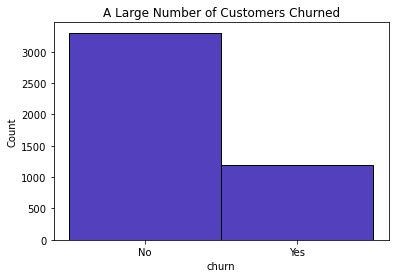

In [9]:
plt.title("A Large Number of Customers Churned")
sns.histplot(train, x = 'churn', legend = True)

In [10]:
# Percentage that Churned:

(train[train.churn == 'Yes'].count().churn / train.churn.shape[0]) * 100

#26.58% of customer churned this month.

26.57777777777778

## Customer Count by Gender:

<AxesSubplot:title={'center':'Gender Appears to be Fairly Evenly Distributed'}, xlabel='gender', ylabel='Count'>

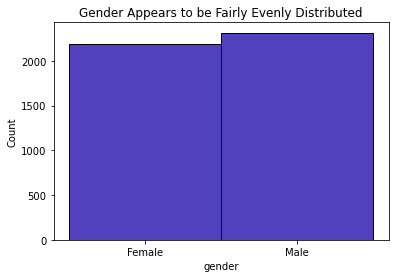

In [11]:
plt.title("Gender Appears to be Fairly Evenly Distributed")
sns.histplot(train, x = 'gender', legend = True)

In [12]:
train.gender.value_counts()

#There are slightly more males than females.

Male      2315
Female    2185
Name: gender, dtype: int64

## Customer Count of Senior Citizens

<AxesSubplot:title={'center':'It Appears Senior Citizens Are a Small Portion of Customer Base'}, xlabel='senior_citizen', ylabel='Count'>

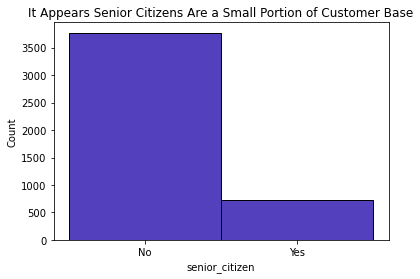

In [13]:
plt.title("It Appears Senior Citizens Are a Small Portion of Customer Base")
sns.histplot(train, x = 'senior_citizen', legend = True)

In [14]:
train.senior_citizen.value_counts()

No     3771
Yes     729
Name: senior_citizen, dtype: int64

In [15]:
(train[train.senior_citizen == 1].shape[0] / train.senior_citizen.shape[0]) * 100
#16.2% of customers are senior citizens.

0.0

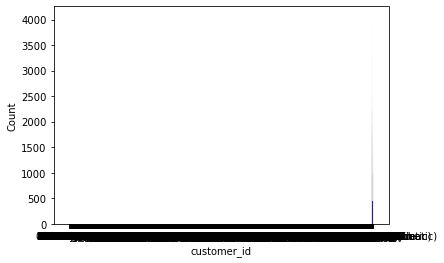

In [16]:
for column in train.select_dtypes('object'):
    sns.histplot(train, x = column, legend = True)

In [ ]:
# I can use the below to look for different shapes between the two sides, and shows which *categorical* variables *may* have some relationship with target variable
# I will have to do statistical analysis to determine level of significance

#First takes: addons and mult-line seem to be worth checking out (look for more to be thorough)

<Figure size 432x288 with 0 Axes>

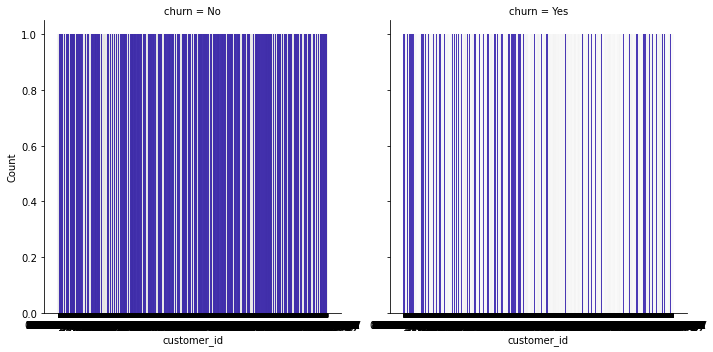

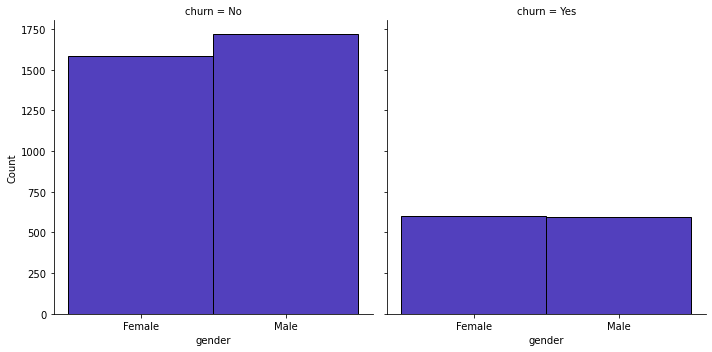

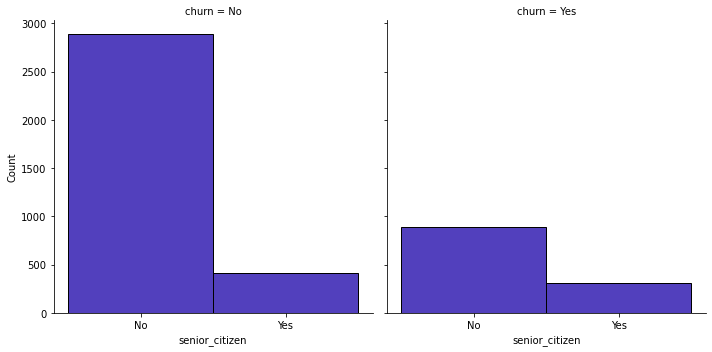

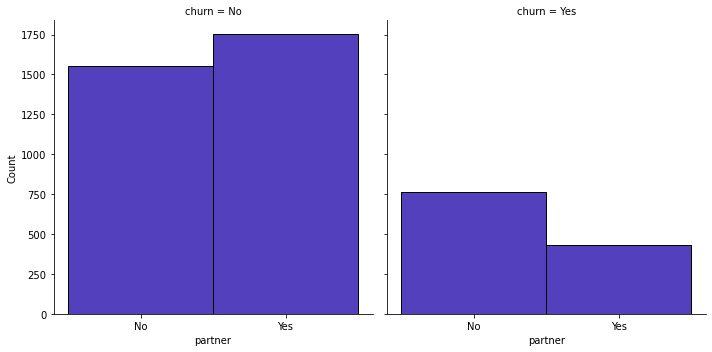

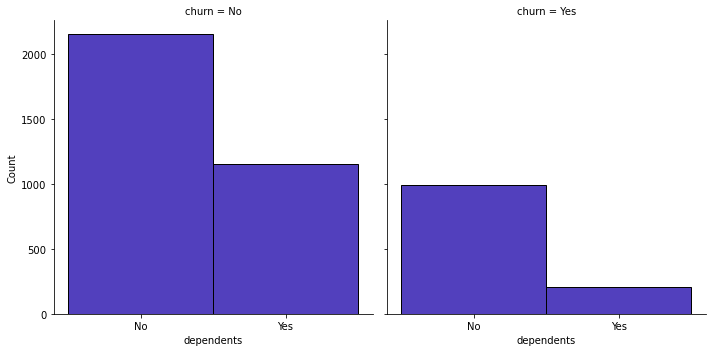

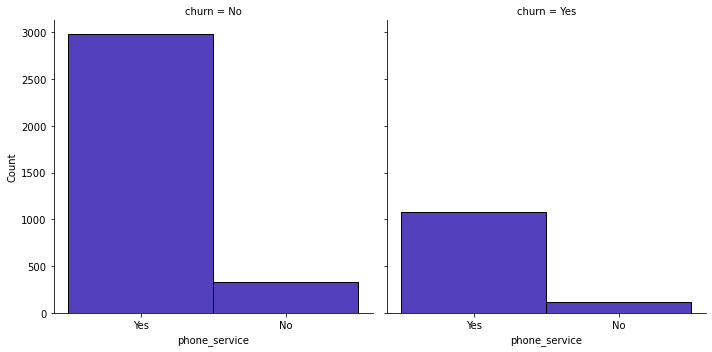

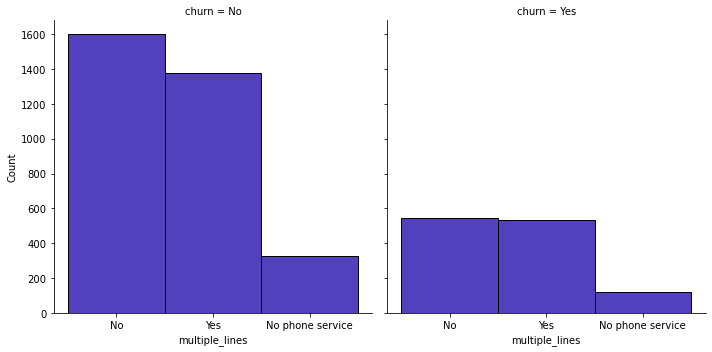

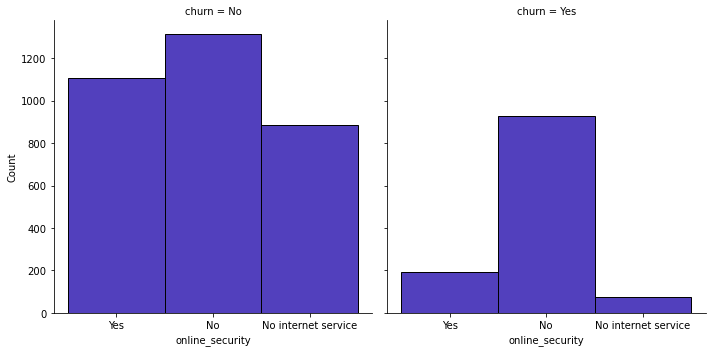

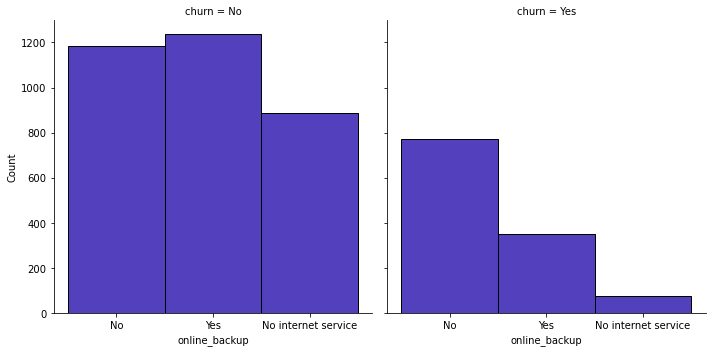

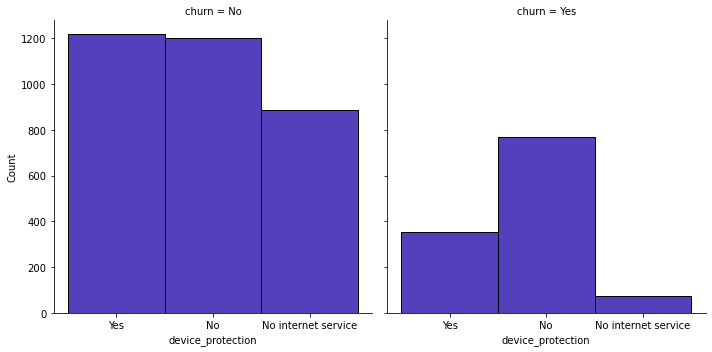

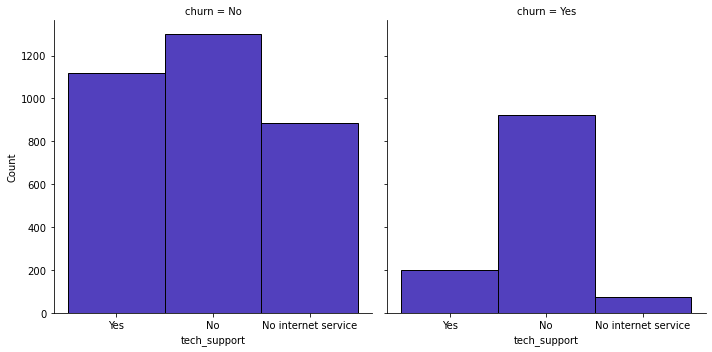

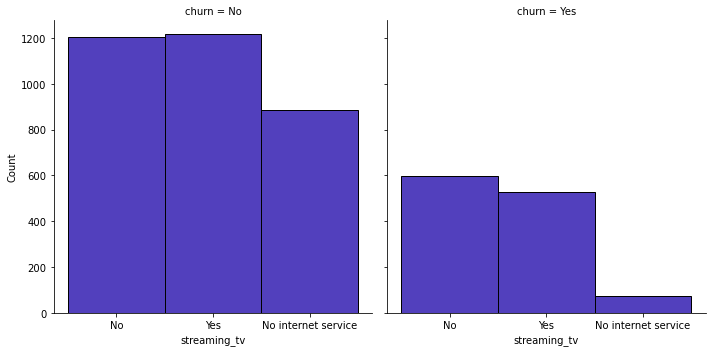

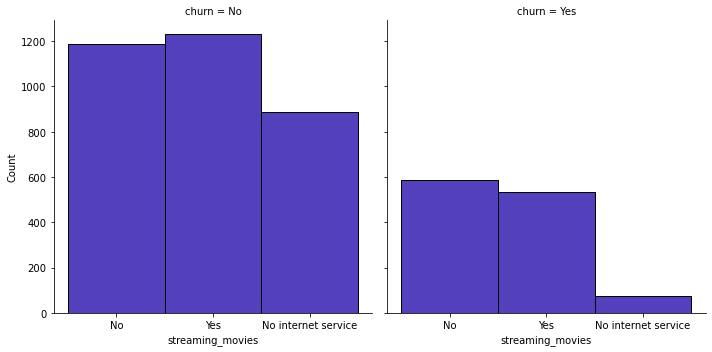

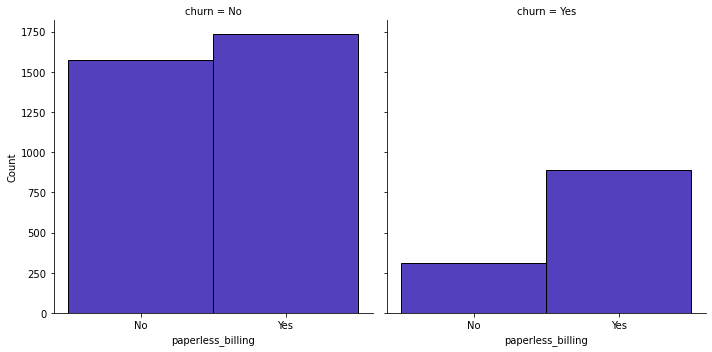

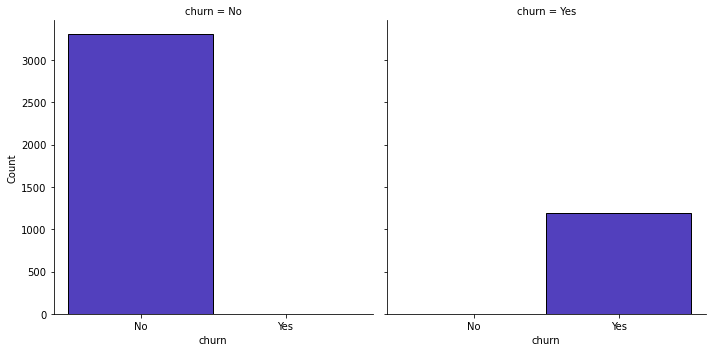

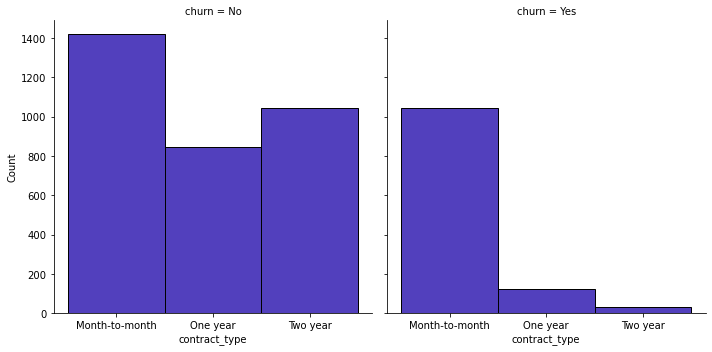

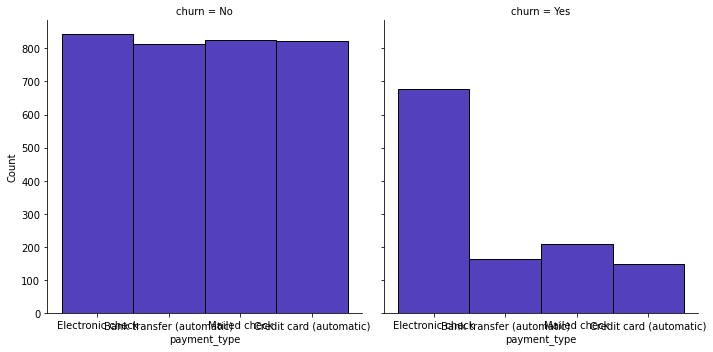

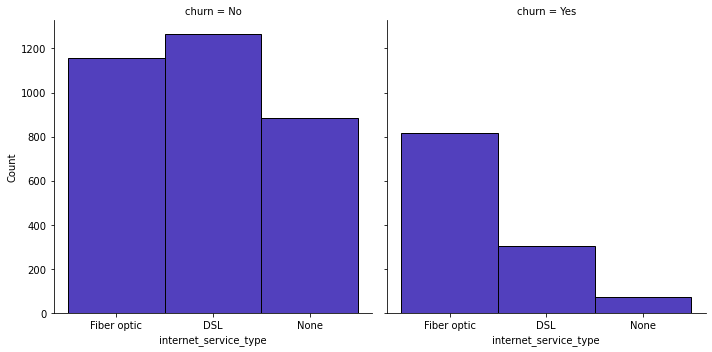

In [23]:
for i, col in enumerate(train.select_dtypes('object')):
    plt.figure(i)
    sns.displot(x = train[col], col = train.churn)

# Bivariate Analysis:

<AxesSubplot:title={'center':'Churn Appears to be Even Across Gender'}, xlabel='churn', ylabel='Count'>

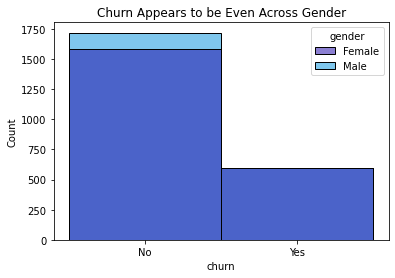

In [18]:
plt.title("Churn Appears to be Even Across Gender")
sns.histplot(train, x = 'churn', legend = True, hue = 'gender')

# I need to come back and find a way to stack these. 

In [19]:
train.groupby('churn').gender.value_counts(normalize = True)

#There doesn't appear to be any major relationship between gender and churn. 

churn  gender
No     Male      0.519976
       Female    0.480024
Yes    Female    0.500836
       Male      0.499164
Name: gender, dtype: float64